# Customer Service Requests Analysis

DESCRIPTION

Background of Problem Statement :
NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective :
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

Domain: Customer Service

Analysis Tasks to be performed:
(Perform a service request data analysis of New York City 311 calls)

### Import a 311 NYC service request.

In [1]:
import sys
import numpy as np
import pandas as pd
import datetime,time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# extract unique elts from list
list1=['a','b','c','a','d']
print(list(dict.fromkeys(list1)))

['a', 'b', 'c', 'd']


In [2]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [86]:
df.shape

(300698, 53)

In [35]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,1.000000e+04,9934.000000,9.914000e+03,9914.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914.000000,9914.000000
mean,3.227474e+07,10908.300081,1.005720e+06,201392.820153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719398,-73.922507
std,1.912532e+04,530.891514,2.263511e+04,30001.554115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082342,0.081634
min,3.223926e+07,10001.000000,9.133570e+05,121998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.501279,-74.254937
25%,3.225971e+07,10457.000000,9.917402e+05,178951.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.657849,-73.972968
50%,3.227331e+07,11214.000000,1.004752e+06,199239.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713465,-73.926066
75%,3.228989e+07,11357.000000,1.021327e+06,218896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767484,-73.866022
max,3.231065e+07,11694.000000,1.066383e+06,270854.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.910061,-73.703633


In [87]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

### Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 
#and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 
#(Hint: Explore the package/module datetime)

In [43]:
df[['Created Date','Closed Date']].head(2).dtypes

Created Date    object
Closed Date     object
dtype: object

In [83]:
df['Closed Date'].head(10)

0    01-01-16 0:55
1    01-01-16 1:26
2    01-01-16 4:51
3    01-01-16 7:43
4    01-01-16 3:24
5    01-01-16 1:50
6    01-01-16 1:53
7    01-01-16 1:42
8    01-01-16 8:27
9    01-01-16 1:17
Name: Closed Date, dtype: object

In [3]:
df['Created Date'] = pd.to_datetime(df['Created Date']) # Convert to datetimes

df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [4]:
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']

In [91]:
df[['Created Date','Closed Date']].head(2).dtypes

Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

### Provide major insights/patterns that you can offer in a visual format (graphs or tables); 

In [92]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# Drop un-interested columns
dropped_cols=['X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location','Resolution Description', 'Resolution Action Updated Date',
       'Community Board','Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','Incident Address']
df_new=df.drop(dropped_cols,axis=1)


In [94]:
df_new.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Landmark', 'Facility Type', 'Status', 'Due Date', 'Borough',
       'Request_Closing_Time'],
      dtype='object')

In [95]:
df_new.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Landmark,Facility Type,Status,Due Date,Borough,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,MANHATTAN,00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,QUEENS,01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,NaN,Precinct,Closed,01-01-16 7:59,BRONX,04:51:31


In [97]:
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [101]:
df['Facility Type'].value_counts()

Precinct    298527
Name: Facility Type, dtype: int64

In [102]:
#df['Landmark'].value_counts()

In [6]:
df_new=df_new.drop(['Facility Type','Landmark','Due Date'],axis=1) #Dropping further columns

In [104]:
df_new.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Status', 'Borough', 'Request_Closing_Time'],
      dtype='object')

In [105]:
df_new.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Borough,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,MANHATTAN,00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,QUEENS,01:26:16


In [107]:
df_new.dtypes

Unique Key                        int64
Created Date             datetime64[ns]
Closed Date              datetime64[ns]
Agency                           object
Agency Name                      object
Complaint Type                   object
Descriptor                       object
Location Type                    object
Incident Zip                    float64
City                             object
Status                           object
Borough                          object
Request_Closing_Time    timedelta64[ns]
dtype: object

In [108]:
# Missing values
df_new.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date             2164
Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              5914
Location Type            131
Incident Zip            2615
City                    2614
Status                     0
Borough                    0
Request_Closing_Time    2164
dtype: int64

In [116]:
len(df_new)

300698

In [122]:
#Percantage of missing values in each column
round(df_new.isnull().sum()/len(df_new)*100,2)

Unique Key              0.00
Created Date            0.00
Closed Date             0.72
Agency                  0.00
Agency Name             0.00
Complaint Type          0.00
Descriptor              1.97
Location Type           0.04
Incident Zip            0.87
City                    0.87
Status                  0.00
Borough                 0.00
Request_Closing_Time    0.72
dtype: float64

In [123]:
# Which borough has the most incident

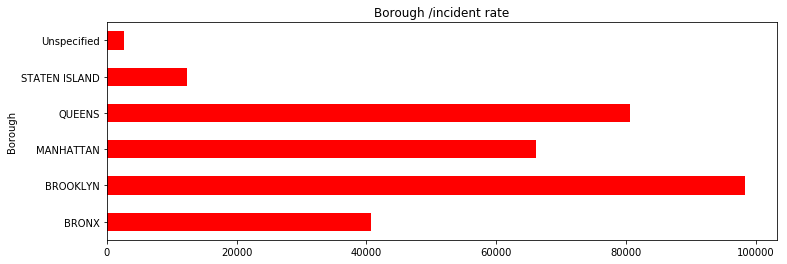

In [129]:
plt.figure(figsize=(12,4))
df_new.groupby(['Borough']).size().plot(kind='barh',title='Borough /incident rate', color='r')
plt.ylabel='Incident rate'
plt.show()

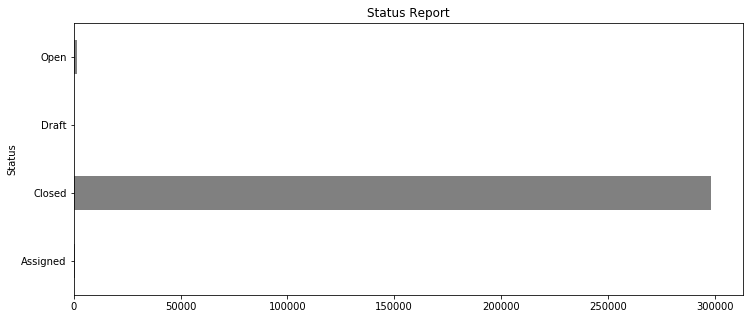

In [138]:
# Visualization of status of incients
status=df_new.groupby(['Status'])

status.size().plot(kind='barh', figsize=(12,5), title=('Status Report'),color='grey');

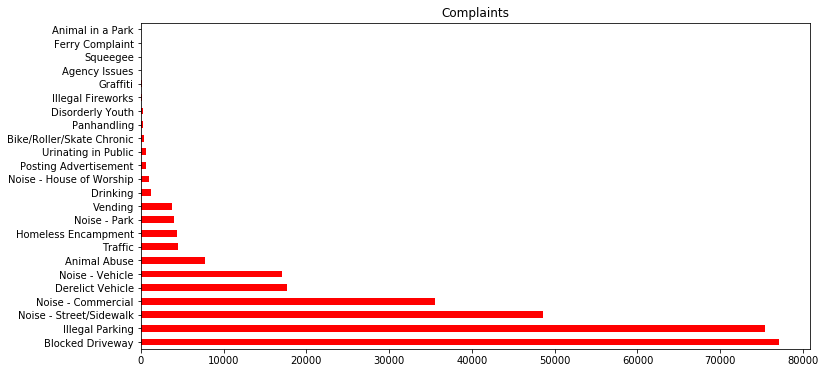

In [142]:
df_new['Complaint Type'].value_counts().plot(kind='barh',color='red',figsize=(12,6),title='Complaints')

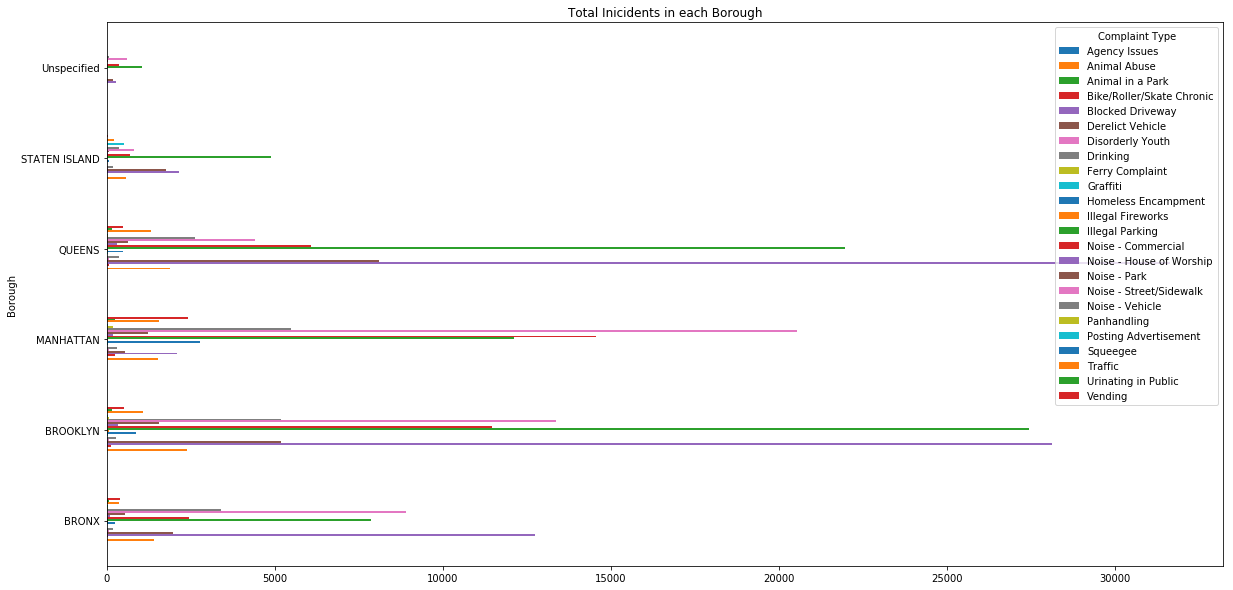

In [158]:
borough_comp=df_new.groupby(['Borough','Complaint Type']).size().unstack()
borough_comp.plot(kind='barh', title='Total Inicidents in each Borough', figsize=(20,10))
#borough_comp.plot(kind='bar', figure=(12,6))

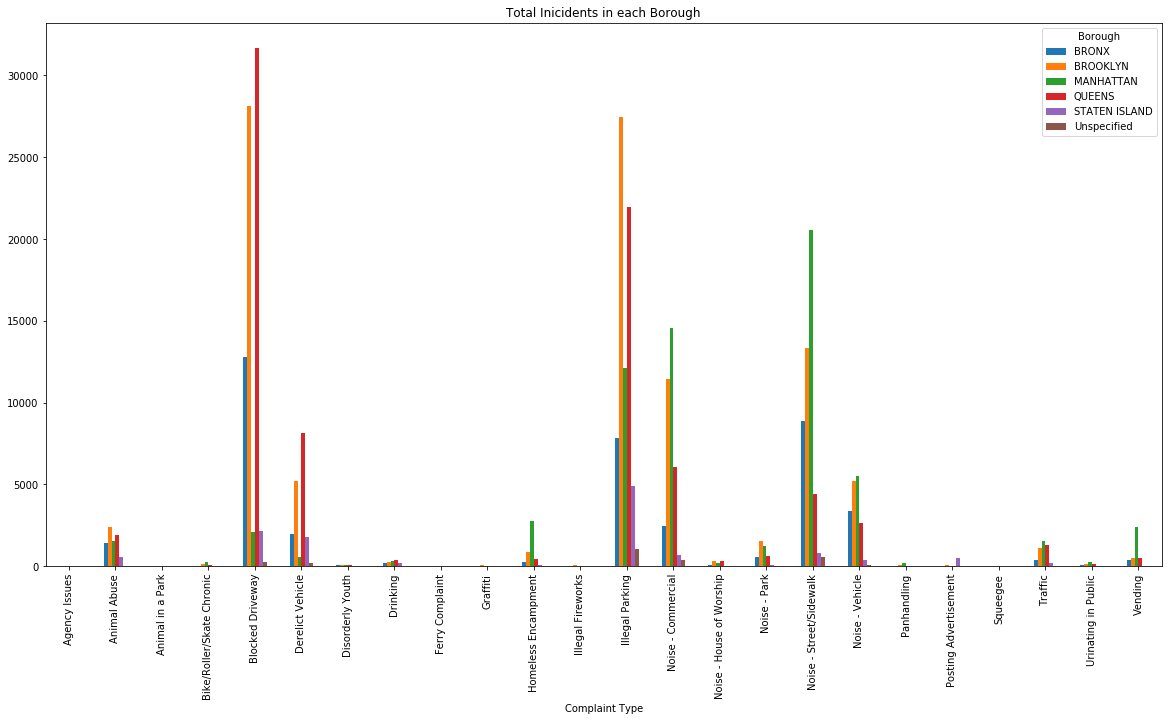

In [167]:
borough_comp=df_new.groupby(['Complaint Type','Borough']).size().unstack()
borough_comp.plot(kind='bar', title='Total Inicidents in each Borough', figsize=(20,10))
#borough_comp

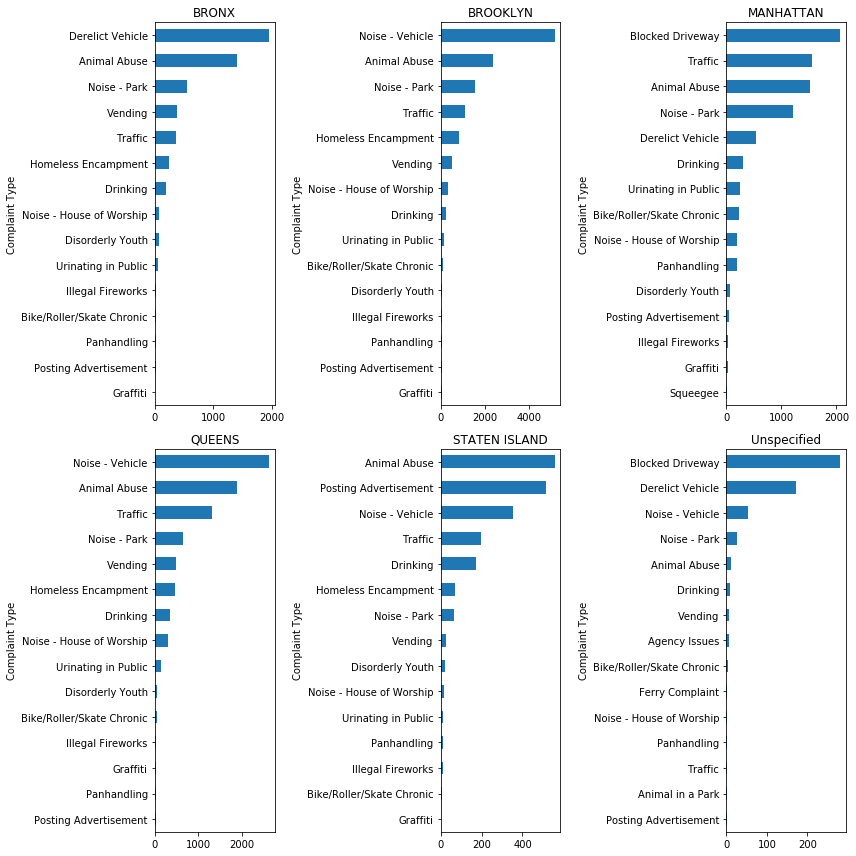

In [172]:
fig, axes = plt.subplots(2,3, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/3), i%3]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

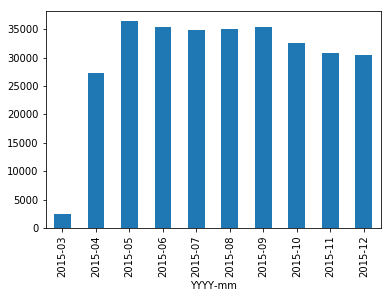

In [7]:
# Monthly incidents
df['YYYY-mm']=df['Created Date'].apply(lambda x :  datetime.datetime.strftime(x, '%Y-%m'))
#df[df['YYYY-mm'] >'2015-0'].shape
df.groupby([df['YYYY-mm']]).size().plot(kind='bar')

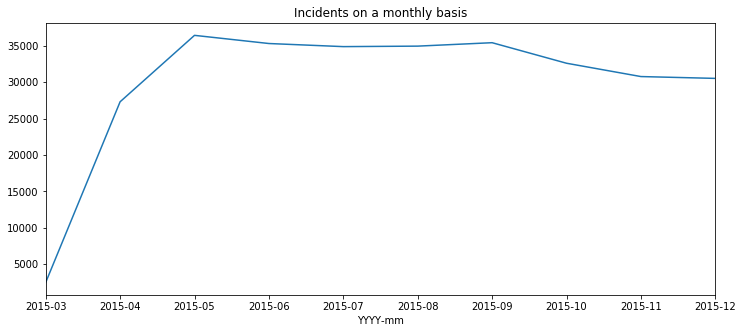

In [188]:
monthly_incidents =  df.groupby('YYYY-mm').size().plot(figsize=(12,5), title='Incidents on a monthly basis')

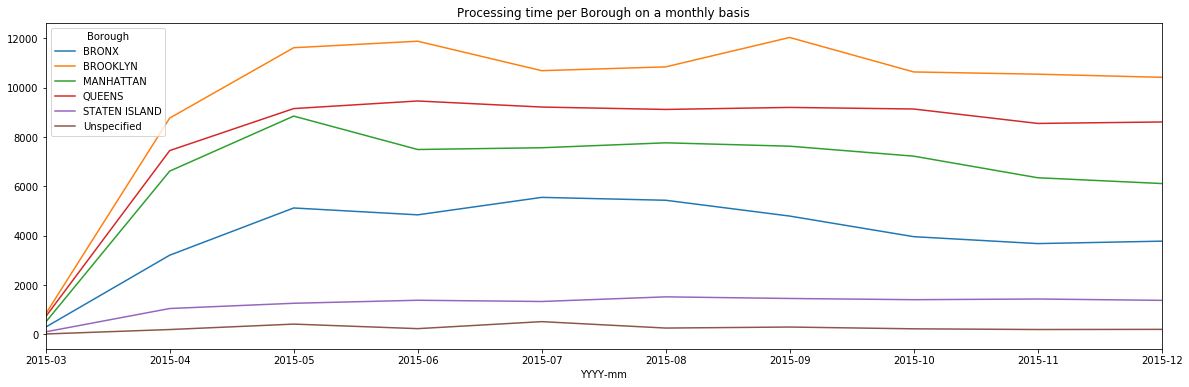

In [200]:
processing_time_per_borough= df.groupby(['YYYY-mm','Borough'])['Request_Closing_Time'].size().unstack()
processing_time_per_borough.plot(figsize=(20,6),title='Processing time per Borough on a monthly basis')

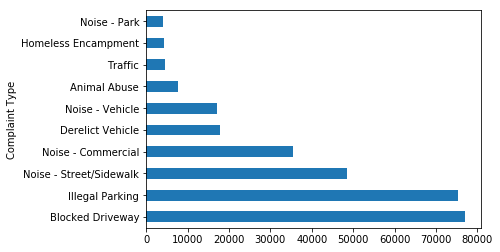

In [208]:
df.groupby(['Complaint Type']).size().sort_values(ascending=False)[:10].plot(kind='barh')

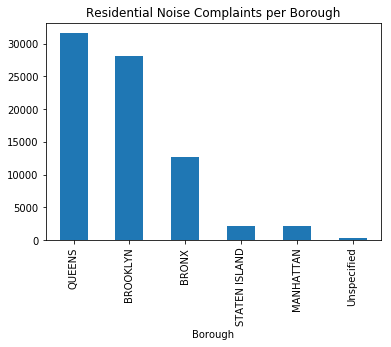

In [209]:
# Borough with the most Noise Complaints - Residential
df[df['Complaint Type']=='Blocked Driveway'].groupby('Borough').size()[:10].sort_values(ascending=False).plot(kind='bar',
                                                                            title='Residential Noise Complaints per Borough');

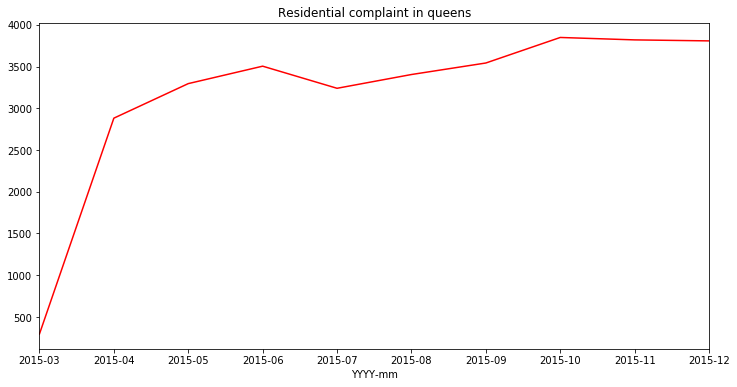

In [216]:
#Blocked driveway is most reported from Queens. Let us see, if any time period influences this
queens_comp=df[(df['Borough']=='QUEENS') & (df['Complaint Type']=='Blocked Driveway')]
queens_comp.groupby('YYYY-mm').size().plot(figsize=(12,6),title='Residential complaint in queens',color='red')

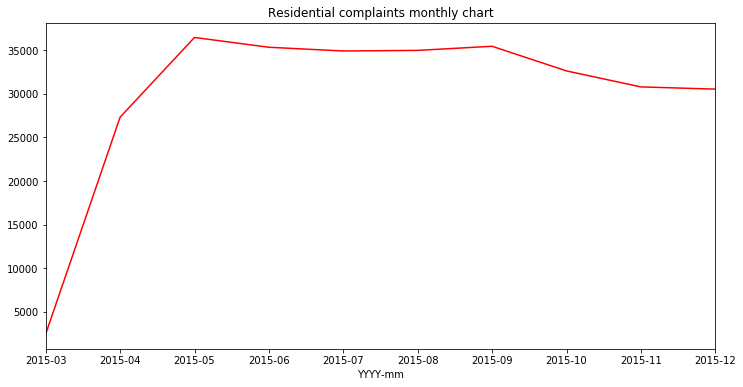

In [219]:
df.groupby('YYYY-mm').size().plot(figsize=(12,6),title='Residential complaints monthly chart',color='red')

Observations:-


Brooklyn has the highest the number of incident calls followed by Queens. Staten Island has the least incident calls.

Majority ofcomplaints are closed, with a very few in open status.

Majority of incidents occur in January followed by November and then the incident calls dips to its lowest in September followed by April.
 
Blocked Driveway were the most complaints in 2014 followed by Illegal parking complaints

Blocked Driveway complaints were reported mostly from Queens and peaked in September and was lowest in February

In [8]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
df['Request_Closing_Time_Float'] = df['Request_Closing_Time'].apply(lambda x: x/datetime.timedelta(minutes=1))
req_time_borough=df.groupby(['Complaint Type','Borough'])['Request_Closing_Time_Float'].mean()

In [9]:
req_time_borough.unstack().sort_values(by='Complaint Type', ascending=True)

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Complaint Type,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,315.619444
Animal Abuse,440.129670,289.950362,221.109082,324.833271,298.170347,204.583333
Animal in a Park,NaN,NaN,NaN,NaN,NaN,20210.083333
Bike/Roller/Skate Chronic,207.538333,300.282282,173.533481,286.033333,244.642857,351.600000
Blocked Driveway,375.705840,264.647022,213.446226,272.256521,244.275218,507.980117
Derelict Vehicle,553.654448,356.849385,255.960459,509.571129,302.374670,854.906159
Disorderly Youth,254.304497,249.031019,144.471014,199.531073,233.610870,NaN
Drinking,347.614894,212.433658,183.465311,233.876237,209.589905,396.283333
Ferry Complaint,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_comp=req_time_borough.reset_index().sort_values('Request_Closing_Time_Float',ascending=False)

Perform a statistical test for the following:

Please note: 
For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.


1.  Whether the average response time across complaint types is similar or not (overall)


2.  Are the type of complaint or service requested and location related?

In [257]:
#Whether the average response time across complaint types is similar or not (overall)- stat test

null hypo= Average response time is  similar across complaint types(no change)
Alternate Hypo= Average response is not similar across complaint types

In [18]:
from scipy import stats
df_comp.head(5)

,Complaint Type,Borough,Request_Closing_Time_Float
7,Animal in a Park,Unspecified,20210.083333
25,Derelict Vehicle,Unspecified,854.906159
89,Panhandling,BRONX,852.823684
64,Noise - Commercial,Unspecified,627.319608
58,Illegal Parking,Unspecified,580.653823


In [27]:
#creating  a few complaint matrixes
#week_1 = df['average_speed'][df['week']==36].as_matrix()
animal_in_park=df_comp[ df_comp['Complaint Type']=='Animal in a Park' ]['Request_Closing_Time_Float'].as_matrix()
derelict_vehicle=df_comp[df_comp['Complaint Type']=='Derelict Vehicle']['Request_Closing_Time_Float'].as_matrix()
panhandling=df_comp[df_comp['Complaint Type']=='Panhandling']['Request_Closing_Time_Float'].as_matrix()
noise_commercial=df_comp[df_comp['Complaint Type']=='Noise - Commercial']['Request_Closing_Time_Float'].as_matrix()
illegal_parking=df_comp[df_comp['Complaint Type']=='Illegal Parking']['Request_Closing_Time_Float'].as_matrix()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [28]:
animal_in_park

array([20210.08333333])

In [29]:
statistic, p_value=stats.f_oneway(animal_in_park,derelict_vehicle,panhandling,noise_commercial,illegal_parking)

In [30]:
print("One way ANOVA,", statistic,p_value)

One way ANOVA, nan nan


In [ ]:
# The p value is less than the significance level of 0.05, so null hypo can be rejected. THis concludes that the population mean 
# across various groups are different. Also average response time across complaints are different